In [479]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Model training libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Model improvement
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Results comparison
from IPython.display import Image

# Save model
import pickle

In [418]:
data = pd.read_csv('C:/& Others/OneDrive/PROGRAMMING/HACKATHON/NEMISA/Weather Model/Weather Data.csv')
data.head()

,Unnamed: 0,Date,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar
0,0,1/1/1979,-15.0,12.333,54,34.362,19.125,0.0,2.821236,0.202806,19.743755
1,1,1/2/1979,-15.0,12.333,54,33.579,19.038,0.0,2.674656,0.160042,19.864798
2,2,1/3/1979,-15.0,12.333,54,34.069,18.327,0.0,2.051383,0.187877,18.966041
3,3,1/4/1979,-15.0,12.333,54,37.393,15.531,0.0,1.565367,0.208814,19.872168
4,4,1/5/1979,-15.0,12.333,54,35.706,14.975,0.0,1.857272,0.365714,19.756289


In [419]:
data = data.drop(['Unnamed: 0'], axis=1)

In [420]:
data.columns

Index(['Date', 'Longitude', 'Latitude', 'Elevation', 'Max Temperature',
       'Min Temperature', 'Precipitation', 'Wind', 'Relative Humidity',
       'Solar'],
      dtype='object')

In [421]:
data.head()

,Date,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar
0,1/1/1979,-15.0,12.333,54,34.362,19.125,0.0,2.821236,0.202806,19.743755
1,1/2/1979,-15.0,12.333,54,33.579,19.038,0.0,2.674656,0.160042,19.864798
2,1/3/1979,-15.0,12.333,54,34.069,18.327,0.0,2.051383,0.187877,18.966041
3,1/4/1979,-15.0,12.333,54,37.393,15.531,0.0,1.565367,0.208814,19.872168
4,1/5/1979,-15.0,12.333,54,35.706,14.975,0.0,1.857272,0.365714,19.756289


In [422]:
data[data['Date']=='1/1/1979']

,Date,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar
0,1/1/1979,-15.000,12.333000,54,34.362,19.125,0.000000,2.821236,0.202806,19.743755
12986,1/1/1979,-15.625,12.333000,3,35.299,17.197,0.000000,2.951609,0.187013,19.721086
25972,1/1/1979,-16.250,12.333000,1,37.474,17.953,0.000000,3.096440,0.181897,19.706680
38958,1/1/1979,-2.500,12.333000,309,34.226,15.807,0.000000,2.610522,0.167910,20.547497
51944,1/1/1979,-3.125,12.333000,258,34.185,16.727,0.000000,2.520315,0.150381,20.531982
...,...,...,...,...,...,...,...,...,...,...
2103732,1/1/1979,-4.375,34.189098,553,13.355,5.705,0.051498,2.228437,0.900794,10.977295
2116718,1/1/1979,-5.000,34.189098,322,4.565,1.343,0.193977,2.491016,0.995830,9.279735
2129704,1/1/1979,-5.625,34.189098,257,13.509,5.645,0.512409,2.355377,0.970330,5.147837
2142690,1/1/1979,-6.250,34.189098,95,17.995,9.504,0.200844,2.073901,0.929680,8.741925


In [423]:
# Split the 'Date' column into day, month, and year
data['Day'] = pd.to_datetime(data['Date']).dt.day
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Year'] = pd.to_datetime(data['Date']).dt.year

In an attempt to not lose the richness of the data, we choose to aggregate it.

There are at least 167 rows for each day. So what we will do is to:
- Group the data by the dates so that we have unique dates in the Date column.
- For the Longitude, Latitude and Elavation, we want to pick one co-ordinate that is rich enough to account for these different places in and arround the region of interest
- With the rest of the numerical data, we will average the rows by date.

In [424]:
# First we calculate the median midpoint latitude coordinate
median_latitude = data['Latitude'].median()

# Then find the corresponding longitude and elevation values
corresponding_longitude = data.loc[data['Latitude'] == median_latitude, 'Longitude'].median()
corresponding_elevation = data.loc[data['Latitude'] == median_latitude, 'Elevation'].median()

print(f"Median Midpoint Latitude Coordinate: {median_latitude}")
print(f"Corresponding Longitude: {corresponding_longitude}")
print(f"Corresponding Elevation: {corresponding_elevation}")

Median Midpoint Latitude Coordinate: 15.1430997848511
Corresponding Longitude: -8.125
Corresponding Elevation: 264.0


In [425]:
# Use the midpoint coordinates to get the average values for other columns grouped by date
aggregated_data = data.groupby(['Month', 'Day', 'Year']).agg({
    'Max Temperature': 'mean',
    'Min Temperature': 'mean',
    'Precipitation': 'mean',
    'Wind': 'mean',
    'Relative Humidity': 'mean',
    'Solar': 'mean'
}).reset_index()

# Set the midpoint coordinates for the selected date
aggregated_data['Latitude'] = median_latitude
aggregated_data['Longitude'] = corresponding_longitude
aggregated_data['Elevation'] = corresponding_elevation

In [426]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the dates in ascending order
aggregated_data = aggregated_data.sort_values(by=['Year', 'Month', 'Day'])

In [427]:
aggregated_data.head()

,Month,Day,Year,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar,Latitude,Longitude,Elevation
0,1,1,1979,29.934575,13.902982,0.029809,3.552641,0.216629,17.917751,15.1431,-8.125,264.0
36,1,2,1979,29.563772,12.728856,0.023513,3.383506,0.228853,17.876389,15.1431,-8.125,264.0
72,1,3,1979,29.660826,12.599551,0.013414,3.006286,0.226219,17.037755,15.1431,-8.125,264.0
108,1,4,1979,30.917952,12.297018,0.084505,2.731692,0.251035,17.007207,15.1431,-8.125,264.0
144,1,5,1979,30.425228,12.502497,0.877508,2.817035,0.313962,16.526413,15.1431,-8.125,264.0


In [428]:
aggregated_data['Date'] = aggregated_data['Month'].astype(str) + '/' + aggregated_data['Day'].astype(str) + '/' + aggregated_data['Year'].astype(str)
aggregated_data = aggregated_data.drop(['Month', 'Day','Year' ], axis = 1)
aggregated_data.head()

,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar,Latitude,Longitude,Elevation,Date
0,29.934575,13.902982,0.029809,3.552641,0.216629,17.917751,15.1431,-8.125,264.0,1/1/1979
36,29.563772,12.728856,0.023513,3.383506,0.228853,17.876389,15.1431,-8.125,264.0,1/2/1979
72,29.660826,12.599551,0.013414,3.006286,0.226219,17.037755,15.1431,-8.125,264.0,1/3/1979
108,30.917952,12.297018,0.084505,2.731692,0.251035,17.007207,15.1431,-8.125,264.0,1/4/1979
144,30.425228,12.502497,0.877508,2.817035,0.313962,16.526413,15.1431,-8.125,264.0,1/5/1979


In [429]:
aggregated_data.isna().sum()

Max Temperature      0
Min Temperature      0
Precipitation        0
Wind                 0
Relative Humidity    0
Solar                0
Latitude             0
Longitude            0
Elevation            0
Date                 0
dtype: int64

In [430]:
aggregated_data.nunique()

Max Temperature      12955
Min Temperature      12947
Precipitation        11890
Wind                 12986
Relative Humidity    12986
Solar                12986
Latitude                 1
Longitude                1
Elevation                1
Date                 12986
dtype: int64

The data now contains 12986 days from the ... we had initially. 

According to the meta data of this data on ..., the **Solar** column was divided by 10 before storing and it is measure in  W/m^2. So let us fix that before modeling

In [431]:
aggregated_data['Solar'] = aggregated_data['Solar']*10

In [432]:
aggregated_data.tail()

,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar,Latitude,Longitude,Elevation,Date
7494,40.282880,23.699988,0.014401,3.246511,0.382509,250.578248,15.1431,-8.125,264.0,7/27/2014
7530,40.222964,24.256251,0.104138,3.605356,0.373836,255.385303,15.1431,-8.125,264.0,7/28/2014
7566,38.436078,24.710533,0.163500,3.939014,0.415803,243.159053,15.1431,-8.125,264.0,7/29/2014
7602,37.867168,24.178287,0.686029,3.644168,0.444437,242.316570,15.1431,-8.125,264.0,7/30/2014
7638,38.694473,24.239731,0.229204,3.223175,0.440260,244.703261,15.1431,-8.125,264.0,7/31/2014


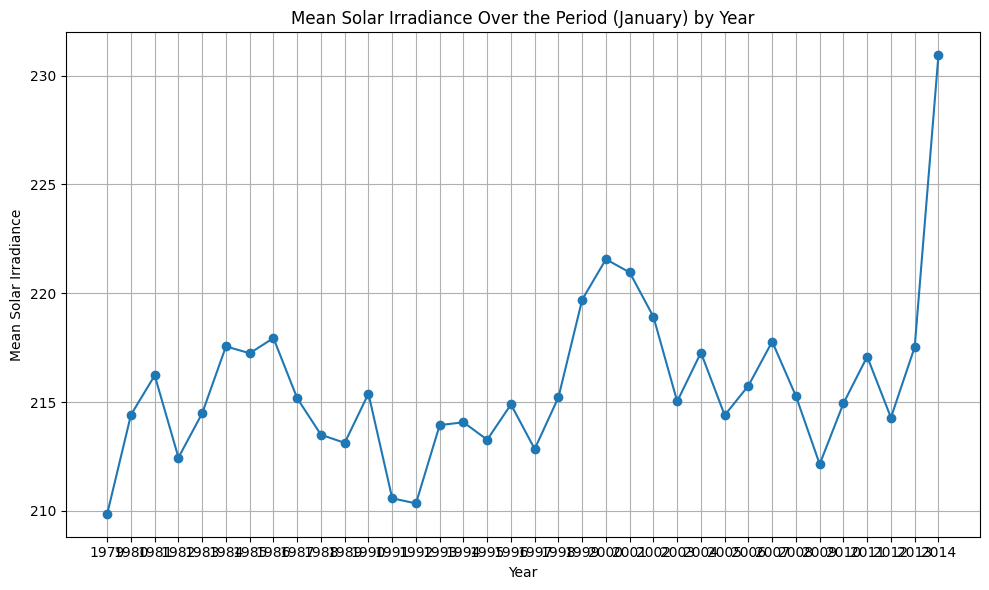

In [433]:
aggregated_data['Date'] = pd.to_datetime(aggregated_data['Date'])

aggregated_data['Year'] = aggregated_data['Date'].dt.year

# Group data by year and calculate the mean solar irradiance for each year
mean_solar_by_year = aggregated_data.groupby('Year')['Solar'].mean()

# Plot the Solar Irradiance over the period with only the year (January) on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(mean_solar_by_year.index, mean_solar_by_year.values, marker='o', linestyle='-')
plt.title('Mean Solar Irradiance Over the Period (January) by Year')
plt.xlabel('Year')
plt.ylabel('Mean Solar Irradiance')
plt.grid(True)
plt.xticks(mean_solar_by_year.index)  # Show only the year (January) on the x-axis
plt.tight_layout()
plt.show()

#### LET'S MODEL

In [434]:
# Split the data into features (X) and target variable (y)
X = aggregated_data[['Longitude', 'Latitude', 'Elevation', 'Max Temperature', 'Min Temperature', 'Precipitation', 'Wind', 'Relative Humidity']]
y = aggregated_data['Solar']

- Train/Test split

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Train model

In [436]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

- Make predictions

In [437]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

- Calculate Potential solar energy

In [438]:
# Constants (for demonstration purposes)
solar_panel_efficiency = 0.18  # 18%
panel_area = 10  # 10 square meters
daylight_hours = 12  # 12 hours

# Calculate potential solar energy
potential_solar_energy = y_pred * solar_panel_efficiency * panel_area * daylight_hours

In [439]:
y_pred

array([177.81835938, 195.58154297, 185.86254883, ..., 239.64038086,
       178.08300781, 207.47094727])

In [440]:
potential_solar_energy

array([3840.8765625 , 4224.56132812, 4014.63105469, ..., 5176.23222656,
       3846.59296875, 4481.37246094])

- Model accuracy

In [441]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 169.02457866422205


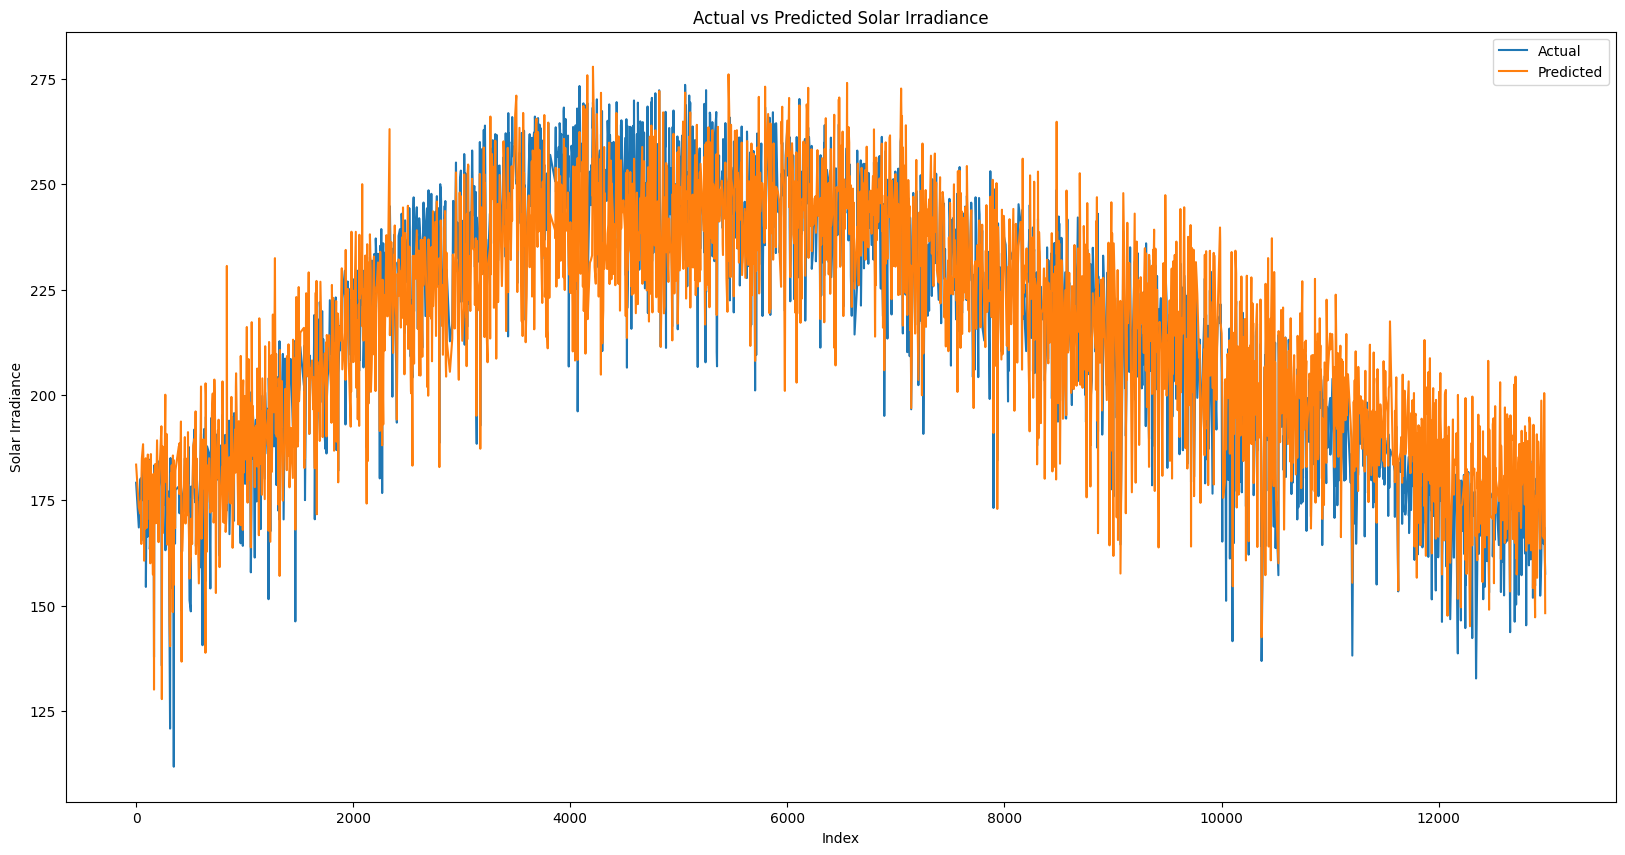

In [442]:
# Sort the test data by date for better visualization
sorted_indices = X_test.index.argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = pd.Series(y_pred[index] for index in sorted_indices)

plt.figure(figsize=(20,10))

# Plot actual vs. predicted values
plt.plot(X_test_sorted.index, y_test_sorted, label='Actual')
plt.plot(X_test_sorted.index, y_pred_sorted, label='Predicted')
plt.xlabel('Index') 
plt.ylabel('Solar Irradiance')
plt.title('Actual vs Predicted Solar Irradiance')
plt.legend()
plt.show()


Alternatively, since all variables  are present and available(besides sunshine duration-we can assume this one), we can calculate the potential solar energy using the formula:
- Potential Solar Energy (PSE)=Solar Irradiance×Solar Panel Efficiency×Panel Area×Daylight Hours

Then from here we will forecast

In [443]:
solar_panel_efficiency = 0.18  # 18% 
panel_area = 10  # 10 square meters 
daylight_hours = 12  # 12 hours 

# Calculate potential solar energy
aggregated_data['Potential Solar Energy'] = aggregated_data['Solar'] * solar_panel_efficiency * panel_area * daylight_hours
aggregated_data.head() 
# The PSE is measured in kWh/kWp/day

,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar,Latitude,Longitude,Elevation,Date,Year,Potential Solar Energy
0,29.934575,13.902982,0.029809,3.552641,0.216629,179.177507,15.1431,-8.125,264.0,1979-01-01,1979,3870.234153
36,29.563772,12.728856,0.023513,3.383506,0.228853,178.763886,15.1431,-8.125,264.0,1979-01-02,1979,3861.299930
72,29.660826,12.599551,0.013414,3.006286,0.226219,170.377549,15.1431,-8.125,264.0,1979-01-03,1979,3680.155048
108,30.917952,12.297018,0.084505,2.731692,0.251035,170.072075,15.1431,-8.125,264.0,1979-01-04,1979,3673.556818
144,30.425228,12.502497,0.877508,2.817035,0.313962,165.264129,15.1431,-8.125,264.0,1979-01-05,1979,3569.705186


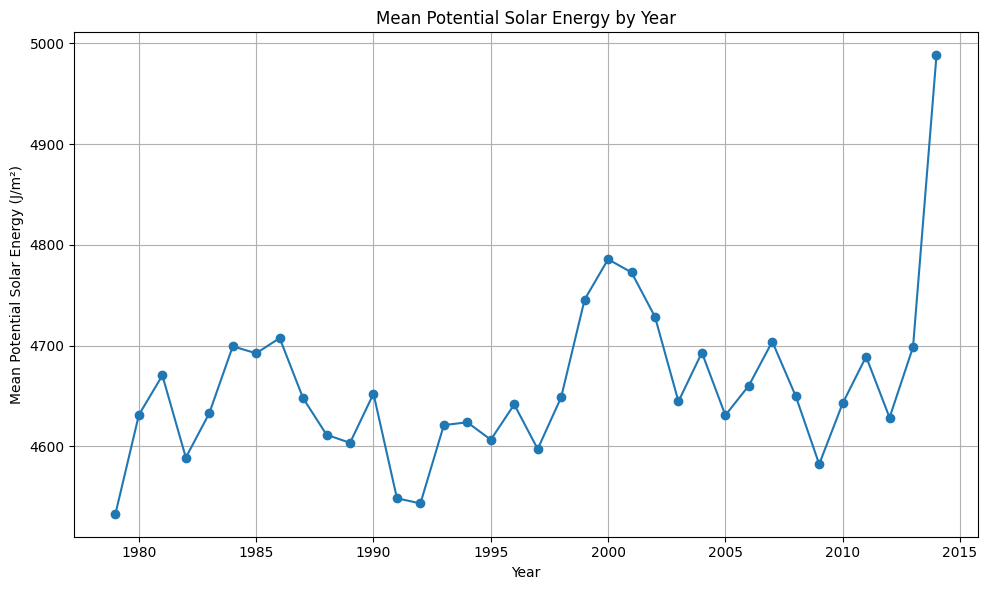

In [444]:
mean_solar_energy_by_year = aggregated_data.groupby('Year')['Potential Solar Energy'].mean()

# Plot the mean potential solar energy grouped by year
plt.figure(figsize=(10, 6))
mean_solar_energy_by_year.plot(marker='o', linestyle='-')
plt.title('Mean Potential Solar Energy by Year')
plt.xlabel('Year')
plt.ylabel('Mean Potential Solar Energy (J/m²)') 
plt.grid(True)
plt.tight_layout()
plt.show()

The infomation for 2014, is not conclusive beacuse the data for 2014 is not complete.

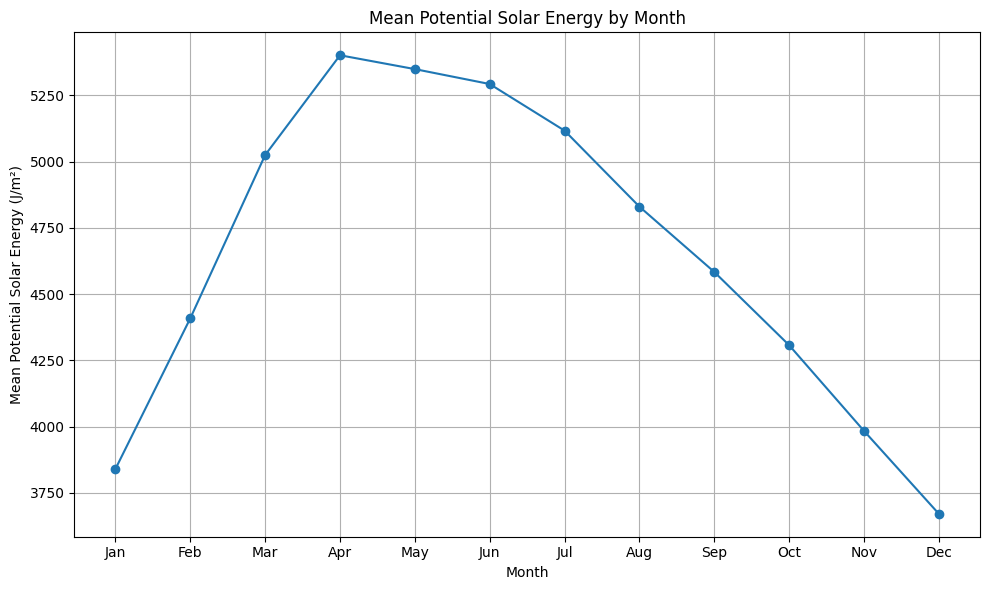

In [445]:
aggregated_data['Month'] = aggregated_data['Date'].dt.month

# Group data by month and calculate the mean potential solar energy for each month
mean_solar_energy_by_month = aggregated_data.groupby('Month')['Potential Solar Energy'].mean()

# Plot the mean potential solar energy grouped by month
plt.figure(figsize=(10, 6))
mean_solar_energy_by_month.plot(marker='o', linestyle='-')
plt.title('Mean Potential Solar Energy by Month')
plt.xlabel('Month')
plt.ylabel('Mean Potential Solar Energy (J/m²)')  # Update with appropriate unit
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

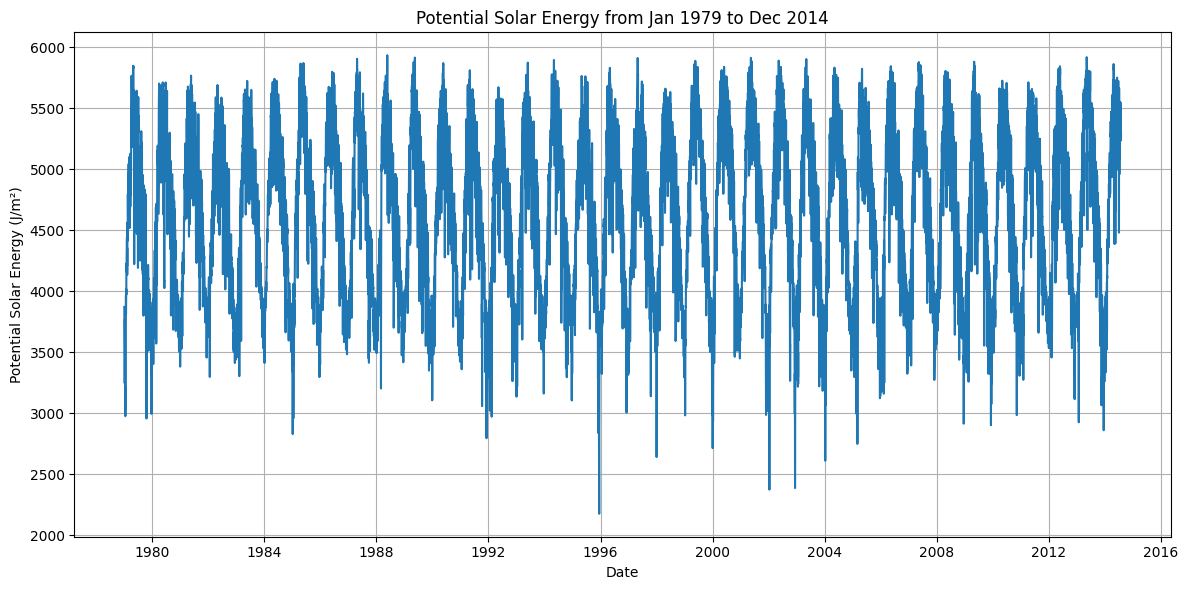

In [446]:
# Filter data to include only the relevant time period (from January 1979 to December 2014)
filtered_data = aggregated_data[(aggregated_data['Date'] >= '1979-01-01') & (aggregated_data['Date'] <= '2014-12-31')]

# Plot the raw potential solar energy values
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Date'], filtered_data['Potential Solar Energy'], linestyle='-')
plt.title('Potential Solar Energy from Jan 1979 to Dec 2014')
plt.xlabel('Date')
plt.ylabel('Potential Solar Energy (J/m²)')  # Update with appropriate unit
plt.grid(True)
plt.tight_layout()
plt.show()

Let's forecast again and get better results

##### MODELLING

In [447]:
# Separate the features (independent variables) and the target variable (potential solar energy)
X = aggregated_data[['Longitude', 'Latitude', 'Elevation', 'Max Temperature', 'Min Temperature', 'Precipitation', 'Wind', 'Relative Humidity', 'Solar']]
y = aggregated_data['Potential Solar Energy']  # Target variable

In [448]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10388, 9)
y_train shape: (10388,)
X_test shape: (2598, 9)
y_test shape: (2598,)


Modelling using the regression model

In [449]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the potential solar energy values for the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.298576007632898e-25


Model evaluation

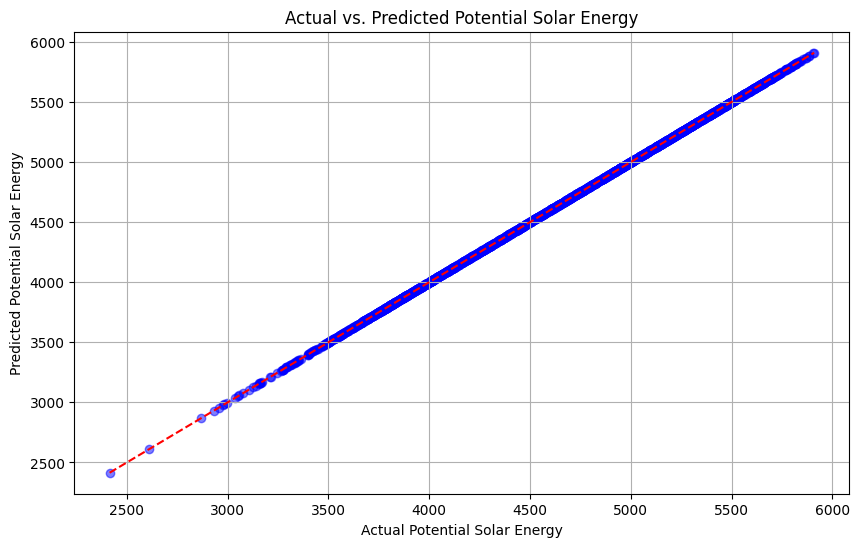

In [450]:
# Plotting actual vs. predicted potential solar energy values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Potential Solar Energy')
plt.ylabel('Predicted Potential Solar Energy')
plt.title('Actual vs. Predicted Potential Solar Energy')
plt.grid(True)
plt.show()

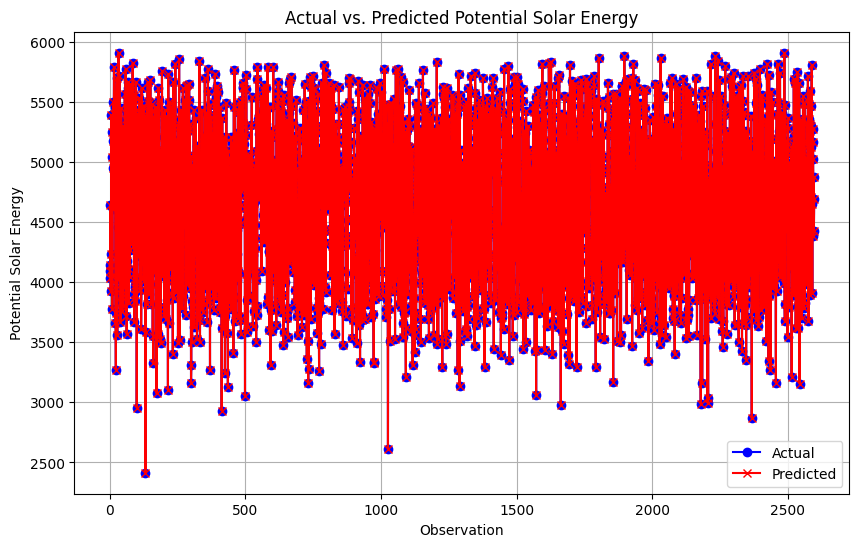

In [451]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicted', color='red', linestyle='-', marker='x')
plt.xlabel('Observation')
plt.ylabel('Potential Solar Energy')
plt.title('Actual vs. Predicted Potential Solar Energy')
plt.legend()
plt.grid(True)
plt.show()

This model is overfitting.

#### Let's try and fix that

In [452]:
# Separate the features (independent variables) and the target variable (potential solar energy)
X = aggregated_data[['Max Temperature', 'Min Temperature', 'Precipitation', 'Wind', 'Relative Humidity', 'Solar']]
y = aggregated_data['Potential Solar Energy']  # Target variable

In [453]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10388, 6)
y_train shape: (10388,)
X_test shape: (2598, 6)
y_test shape: (2598,)


Modelling using the regression model

In [454]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the potential solar energy values for the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0394680157168965e-24


Model evaluation

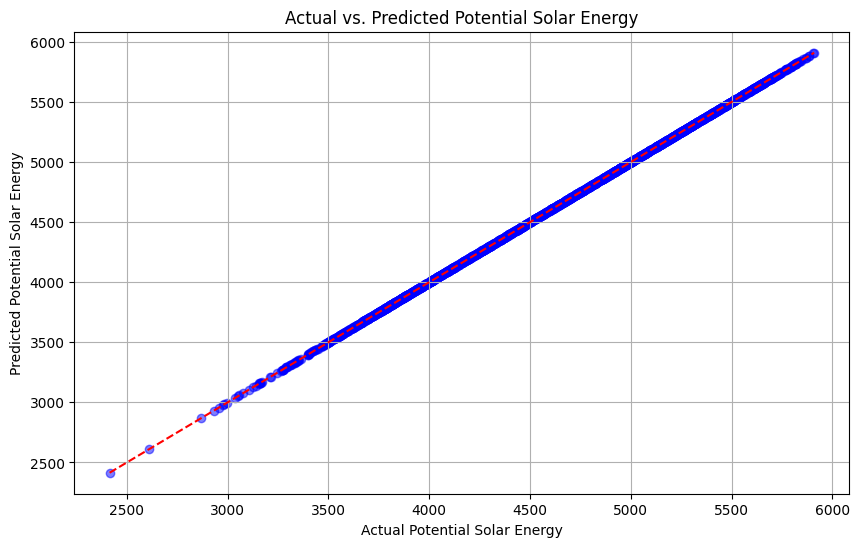

In [455]:
# Plotting actual vs. predicted potential solar energy values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Potential Solar Energy')
plt.ylabel('Predicted Potential Solar Energy')
plt.title('Actual vs. Predicted Potential Solar Energy')
plt.grid(True)
plt.show()

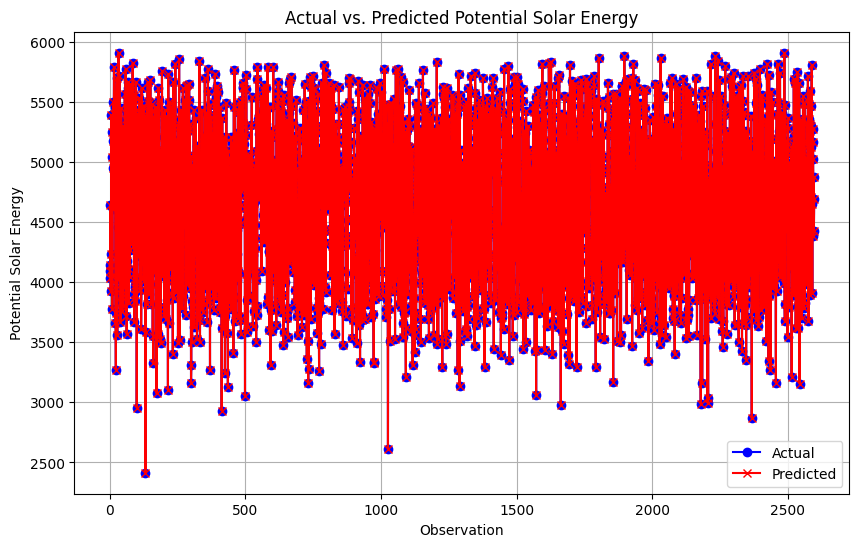

In [456]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicted', color='red', linestyle='-', marker='x')
plt.xlabel('Observation')
plt.ylabel('Potential Solar Energy')
plt.title('Actual vs. Predicted Potential Solar Energy')
plt.legend()
plt.grid(True)
plt.show()

Since the model is overfitting still, let us then implement **K-Fold Cross Validation** and **L2(Ridge) Regularization**

1. Cross Validation
- Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.(https://machinelearningmastery.com/k-fold-cross-validation/)

In [457]:
# We initialize the linear regression model with Ridge regularization
model_ridge = Ridge()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean squared error from cross-validation scores
mse_cv = -cv_scores.mean()
print("Mean Squared Error (Cross-Validation):", mse_cv)

Mean Squared Error (Cross-Validation): 3.8757165297285414e-08


2. Regularization
- Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated.(https://en.wikipedia.org/wiki/Ridge_regression)

In [458]:
# Initialize the linear regression model with Ridge regularization
model_ridge = Ridge(alpha=10.0)  

# Train the model on the training data
model_ridge.fit(X_train, y_train)

# Predict the potential solar energy values for the testing set
y_pred_ridge = model_ridge.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge Regression):", mse_ridge)

Mean Squared Error (Ridge Regression): 2.29490459175191e-06


In [459]:
# Initialize the linear regression model with Ridge regularization
model_ridge = Ridge(alpha=1000.0)  

# Train the model on the training data
model_ridge.fit(X_train, y_train)

# Predict the potential solar energy values for the testing set
y_pred_ridge = model_ridge.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge Regression):", mse_ridge)

Mean Squared Error (Ridge Regression): 0.015198329510149875


- Now the MSE is relatively low yet not extremely close to zero. This MSE of 0.015 suggests that the model is making accurate predictions.
- The use of Ridge regression with regularization helped prevent overfitting by penalizing large coefficients. The resulting MSE of 0.015 suggests that the regularization effectively balanced model complexity and accuracy.
- In comparison to the previous MSE 6.298576007632898e-25, 1.0394680157168965e-24, 3.8757165297285414e-08 and 2.29490459175191e-06, he MSE of  0.015198329510149875 is a good fit for the model.

1. MSE: 0.015: This MSE indicates a relatively low error compared to the other MSE values. It suggests that the model has good predictive accuracy and performs well in estimating potential solar energy values.

2. MSE: 6.298576007632898e-25: This MSE is extremely small, close to zero. While such a low MSE might seem desirable, it could indicate potential issues such as overfitting or data leakage. Further investigation is needed to ensure the model's generalization to unseen data.

3. MSE: 1.0394680157168965e-24: Similar to the previous MSE, this value is also extremely small. It raises concerns about overfitting and the model's ability to generalize to new data.

4. MSE: 3.8757165297285414e-08: This MSE is small but larger than the previous two. It suggests that the model's predictions have relatively low error, but there may still be room for improvement in predictive accuracy.

5. MSE: 2.29490459175191e-06: This MSE is larger than the previous values but still relatively small. It indicates moderate predictive accuracy, with some error in estimating potential solar energy values.

In summary, the MSE of 0.015 appears to be the most reasonable among other values, indicating good predictive accuracy without being too small to raise concerns about overfitting or data leakage.

### Now we use the weather API from Open Meteo
- Based on a 7 day weather forecast, we want to obtain the potential solar energy using the formula"

In [460]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

In [461]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": 15.1431,
	"longitude": -8.125,
	"current": "relative_humidity_2m",
	"daily": ["temperature_2m_max", "temperature_2m_min", "precipitation_sum", "wind_speed_10m_max", "shortwave_radiation_sum"],
	"timezone": "auto"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Current values. The order of variables needs to be the same as requested.
current = response.Current()
current_relative_humidity_2m = current.Variables(0).Value()

print(f"Current time {current.Time()}")
print(f"Current relative_humidity_2m {current_relative_humidity_2m}")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_max = daily.Variables(0).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(1).ValuesAsNumpy()
daily_precipitation_sum = daily.Variables(2).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(3).ValuesAsNumpy()
daily_shortwave_radiation_sum = daily.Variables(4).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s"),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s"),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["precipitation_sum"] = daily_precipitation_sum
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max
daily_data["shortwave_radiation_sum"] = daily_shortwave_radiation_sum

daily_dataframe = pd.DataFrame(data = daily_data)
print(daily_dataframe)

Coordinates 15.125°N -8.125°E
Elevation 275.0 m asl
Timezone b'Africa/Bamako' None
Timezone difference to GMT+0 0 s
Current time 1707678000
Current relative_humidity_2m 10.0
        date  temperature_2m_max  temperature_2m_min  precipitation_sum  \
0 2024-02-11           37.667000           19.017000                0.0   
1 2024-02-12           37.466999           18.467001                0.0   
2 2024-02-13           39.667000           19.517000                0.0   
3 2024-02-14           39.667000           20.517000                0.0   
4 2024-02-15           39.017002           20.917000                0.0   
5 2024-02-16           38.817001           22.267000                0.0   
6 2024-02-17           37.667000           21.867001                0.0   

   wind_speed_10m_max  shortwave_radiation_sum  
0           13.783817                23.049999  
1           14.386494                22.980000  
2           16.203999                22.959999  
3           16.935310        

In [462]:
daily_dataframe

,date,temperature_2m_max,temperature_2m_min,precipitation_sum,wind_speed_10m_max,shortwave_radiation_sum
0,2024-02-11,37.667000,19.017000,0.0,13.783817,23.049999
1,2024-02-12,37.466999,18.467001,0.0,14.386494,22.980000
2,2024-02-13,39.667000,19.517000,0.0,16.203999,22.959999
3,2024-02-14,39.667000,20.517000,0.0,16.935310,22.660000
4,2024-02-15,39.017002,20.917000,0.0,17.015474,23.260000
5,2024-02-16,38.817001,22.267000,0.0,17.698677,20.850000
6,2024-02-17,37.667000,21.867001,0.0,20.265795,22.110001


In [463]:
#daily_dataframe = pd.DataFrame(daily_dataframe)

In [464]:
daily_dataframe = daily_dataframe.rename(columns = {'temperature_2m_max':'Max Temperature',
                                          'temperature_2m_min' : 'Min Temperature',
                                          'precipitation_sum' : 'Precipitation',
                                          'wind_speed_10m_max' : 'Wind',
                                          'shortwave_radiation_sum' : 'Solar'})#, inplace = True) 

In [465]:
daily_dataframe['Relative Humidity'] = current_relative_humidity_2m
daily_dataframe['Solar'] = daily_dataframe['Solar']*10

In [466]:
# Prediction using the ridge regression model
solar_energy_prediction = model_ridge.predict(daily_dataframe[['Max Temperature', 'Min Temperature', 'Precipitation', 'Wind', 'Relative Humidity', 'Solar']])

# Adding the predicted solar energy to the dataframe
daily_dataframe['Potential Solar Energy'] = solar_energy_prediction

print(daily_dataframe)

        date  Max Temperature  Min Temperature  Precipitation       Wind  \
0 2024-02-11        37.667000        19.017000            0.0  13.783817   
1 2024-02-12        37.466999        18.467001            0.0  14.386494   
2 2024-02-13        39.667000        19.517000            0.0  16.203999   
3 2024-02-14        39.667000        20.517000            0.0  16.935310   
4 2024-02-15        39.017002        20.917000            0.0  17.015474   
5 2024-02-16        38.817001        22.267000            0.0  17.698677   
6 2024-02-17        37.667000        21.867001            0.0  20.265795   

        Solar  Relative Humidity  Potential Solar Energy  
0  230.500000               10.0             4980.389797  
1  229.799988               10.0             4965.364473  
2  229.599991               10.0             4961.444336  
3  226.600006               10.0             4896.739779  
4  232.600006               10.0             5026.234094  
5  208.500000               10.0     

In [469]:
daily_dataframe['Potential Solar Energy(kWh)'] = daily_dataframe['Potential Solar Energy']/1000

A kilowatt hour (kWh) is a measure of how much energy you're using. Despite the name, it doesn't mean the number of kilowatts you're using per hour. It's a unit of measurement. 1 kilowatt hour is the amount of energy you'd use if you kept a 1,000 watt appliance running for an hour.(https://www.ovoenergy.com/guides/energy-guides/what-is-a-kwh-kw-and-kwh-explained)

kWp is the peak power of a PV system or panel. Solar panel systems are given a rating in kilowatts peak (kWp) which is the rate at which they generate energy at peak performance, such as on a sunny day in the afternoon.(https://www.evoenergy.co.uk/news-updates/what-is-a-kwp/)

'A lot of this potential in the less developed countries of Africa is still untapped, but as the source states, represents "a unique opportunity to provide affordable, reliable, and sustainable electricity services to a large share of humanity where improved economic opportunities and quality of life are the most needed".'
(https://www.statista.com/chart/27722/practical-potential-solar-energy-output-by-global-region/)

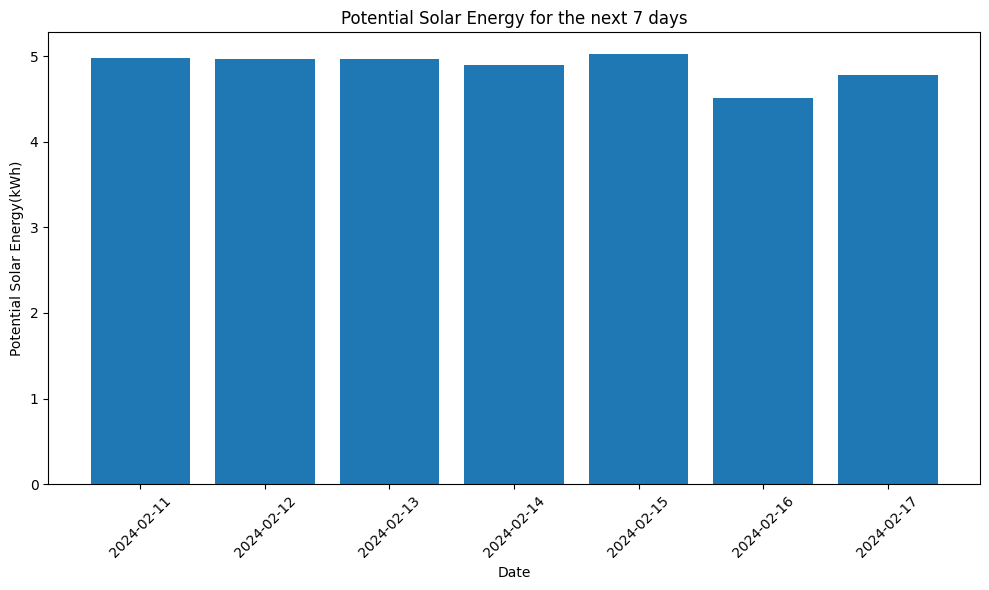

In [485]:
# Plotting bar graph
plt.figure(figsize=(10, 6))
plt.bar(daily_dataframe['date'], daily_dataframe['Potential Solar Energy(kWh)'])
plt.xlabel('Date')
plt.ylabel('Potential Solar Energy(kWh)')
plt.title('Potential Solar Energy for the next 7 days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

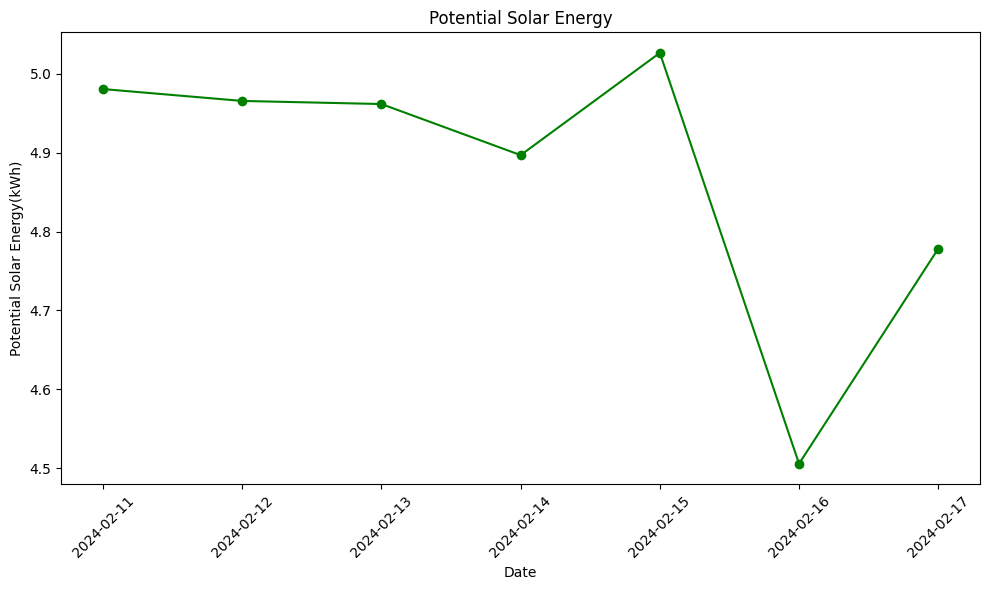

In [471]:
# Plotting line graph
plt.figure(figsize=(10, 6))
plt.plot(daily_dataframe['date'], daily_dataframe['Potential Solar Energy(kWh)'], marker='o', color='green', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Potential Solar Energy(kWh)')
plt.title('Potential Solar Energy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

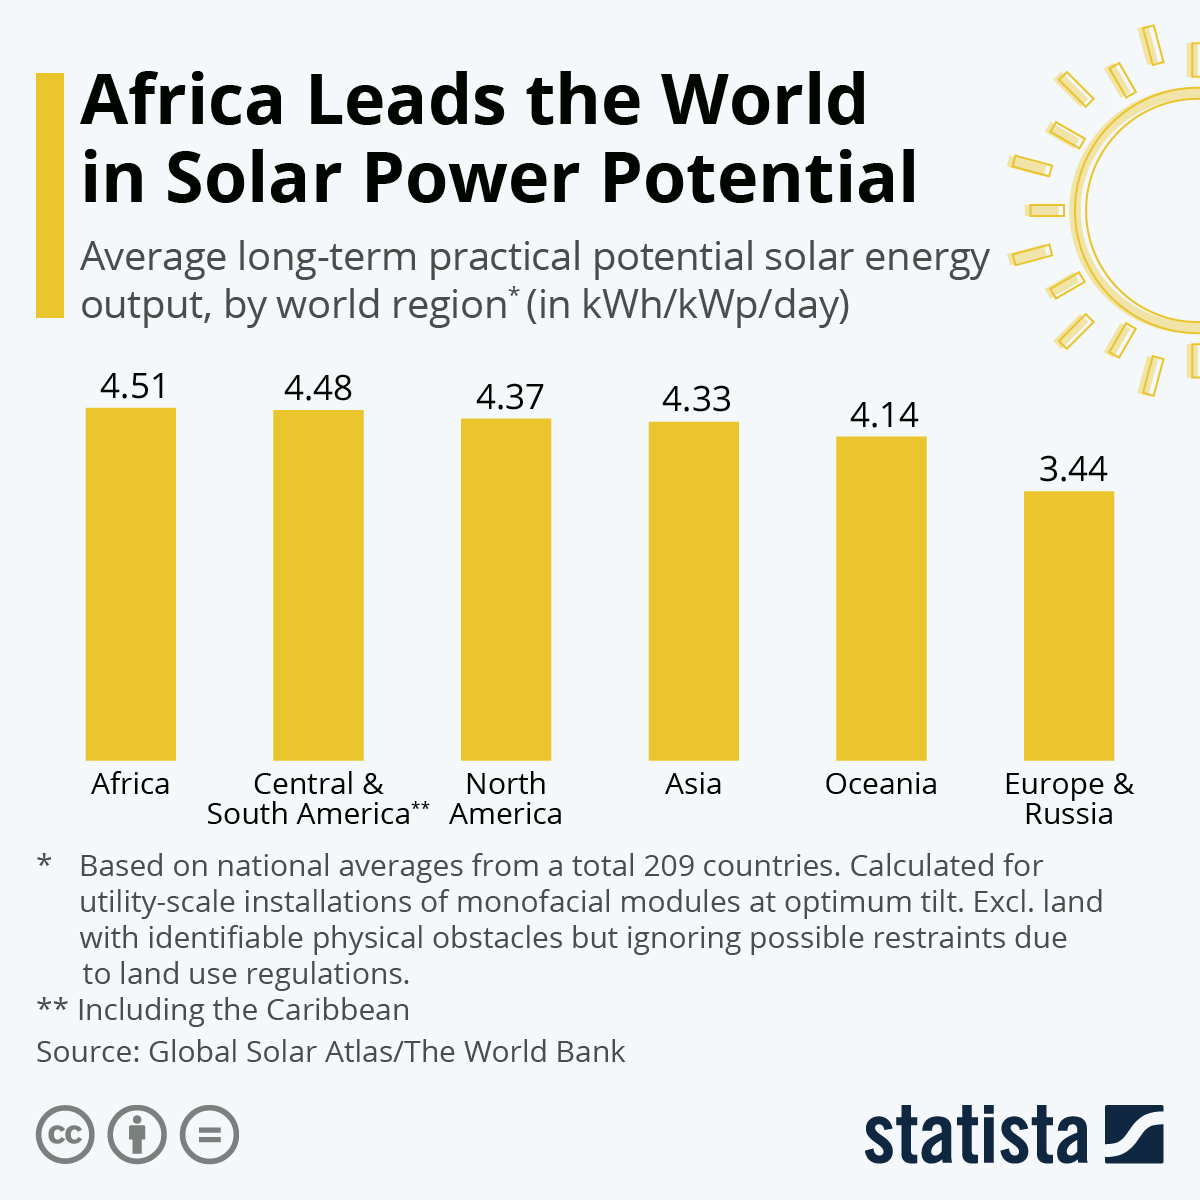

In [478]:
Image("https://cdn.statcdn.com/Infographic/images/normal/27722.jpeg", width=600,  height=350)

In [480]:
# save the model to disk
filename = 'PSE_model.sav'
pickle.dump(model, open(filename, 'wb'))

##### References
1. https://globalsolaratlas.info/global-pv-potential-study